In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [5]:
# Cargar dataset
df = pd.read_csv("teen_phone_addiction_dataset.csv")

# Vista general
print(df.head())

   ID               Name  Age  Gender          Location School_Grade  \
0   1    Shannon Francis   13  Female        Hansonfort          9th   
1   2    Scott Rodriguez   17  Female      Theodorefort          7th   
2   3        Adrian Knox   13   Other       Lindseystad         11th   
3   4  Brittany Hamilton   18  Female      West Anthony         12th   
4   5       Steven Smith   14   Other  Port Lindsaystad          9th   

   Daily_Usage_Hours  Sleep_Hours  Academic_Performance  Social_Interactions  \
0                4.0          6.1                    78                    5   
1                5.5          6.5                    70                    5   
2                5.8          5.5                    93                    8   
3                3.1          3.9                    78                    8   
4                2.5          6.7                    56                    4   

   ...  Screen_Time_Before_Bed  Phone_Checks_Per_Day  Apps_Used_Daily  \
0  ...       

In [6]:
# Ver estructura general
df.info()

# Ver estadísticas básicas de columnas numéricas
df.describe()

# Ver nombres exactos de columnas
print(df.columns)

# Para normalizar y eliminar posibles espacios
df.columns = df.columns.str.lower().str.replace(' ', '_')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [7]:
columnas_utiles = [
    'age', 'gender', 'daily_usage_hours', 'sleep_hours',
    'academic_performance', 'exercise_hours', 'anxiety_level',
    'apps_used_daily', 'time_on_social_media', 'time_on_gaming',
    'addiction_level'
]

df = df[columnas_utiles]
print(df.columns.tolist())

['age', 'gender', 'daily_usage_hours', 'sleep_hours', 'academic_performance', 'exercise_hours', 'anxiety_level', 'apps_used_daily', 'time_on_social_media', 'time_on_gaming', 'addiction_level']


In [8]:
print("Valores únicos en 'gender':")
print(df['gender'].unique())

print("\nConteo por categoría:")
print(df['gender'].value_counts())

Valores únicos en 'gender':
['Female' 'Other' 'Male']

Conteo por categoría:
gender
Male      1016
Female    1007
Other      977
Name: count, dtype: int64


In [9]:
# Pasar a minúsculas y limpiar espacios
df['gender'] = df['gender'].str.strip().str.lower()

# Filtrar solo 'male' y 'female'
df = df[df['gender'].isin(['male', 'female'])]

# Verificar conteo final
print(df['gender'].value_counts())

gender
male      1016
female    1007
Name: count, dtype: int64


In [10]:
print(df.describe())

               age  daily_usage_hours  sleep_hours  academic_performance  \
count  2023.000000        2023.000000  2023.000000           2023.000000   
mean     16.004943           5.053584     6.501038             74.706377   
std       1.988586           1.969979     1.502518             14.803954   
min      13.000000           0.000000     3.000000             50.000000   
25%      14.000000           3.700000     5.500000             62.000000   
50%      16.000000           5.000000     6.500000             75.000000   
75%      18.000000           6.400000     7.500000             88.000000   
max      19.000000          11.200000    10.000000            100.000000   

       exercise_hours  anxiety_level  apps_used_daily  time_on_social_media  \
count     2023.000000    2023.000000      2023.000000           2023.000000   
mean         1.039199       5.589718        12.506673              2.502076   
std          0.726175       2.862620         4.590968              0.975301   

In [11]:
# Ver tipos de datos
print(df.dtypes)

# Verificar valores nulos
print(df.isnull().sum())

# Revisar duplicados
print(f"Duplicados: {df.duplicated().sum()}")

# Valores atípicos (ejemplo en edad)
print(df[df['age'] < 13])
print(df[df['age'] > 19])

# Ejemplo: valores extremos en daily_usage_hours
print(df[df['daily_usage_hours'] > 10])

# Valores extremos en sleep_hours
print(df[df['sleep_hours'] < 4])

age                       int64
gender                   object
daily_usage_hours       float64
sleep_hours             float64
academic_performance      int64
exercise_hours          float64
anxiety_level             int64
apps_used_daily           int64
time_on_social_media    float64
time_on_gaming          float64
addiction_level         float64
dtype: object
age                     0
gender                  0
daily_usage_hours       0
sleep_hours             0
academic_performance    0
exercise_hours          0
anxiety_level           0
apps_used_daily         0
time_on_social_media    0
time_on_gaming          0
addiction_level         0
dtype: int64
Duplicados: 0
Empty DataFrame
Columns: [age, gender, daily_usage_hours, sleep_hours, academic_performance, exercise_hours, anxiety_level, apps_used_daily, time_on_social_media, time_on_gaming, addiction_level]
Index: []
Empty DataFrame
Columns: [age, gender, daily_usage_hours, sleep_hours, academic_performance, exercise_hours, anxiet

Se realiza un analisis y se tiene la siguiente conclusión sobre el dataset:
- No hay valores nulos.
- No hay duplicados.
- Todas las columnas tienen el tipo de dato correcto (`int64`, `float64`, `object` para `gender`).
- Edad: entre 13 y 19 años → lógico para adolescentes.
- Horas de uso diario: hasta 11.2 horas → alto pero realista.
- Horas de sueño: mínimo 3 horas → posible en casos extremos.
- `gender` estandarizado: solo `male` y `female` en minúsculas.

# Preparación del conjunto de datos

Tras realizar un proceso de limpieza y verificación de calidad, se concluye que el DataFrame se encuentra en condiciones óptimas para proceder con el análisis exploratorio. Se eliminaron columnas irrelevantes, se estandarizaron las variables categóricas (como el género), y se confirmó la ausencia de valores nulos y registros duplicados. Además, se validaron los rangos de cada variable para asegurar su coherencia con el contexto del estudio. Por tanto, el conjunto de datos está listo para ser analizado mediante técnicas gráficas y estadísticas que permitan extraer patrones e insights relevantes.

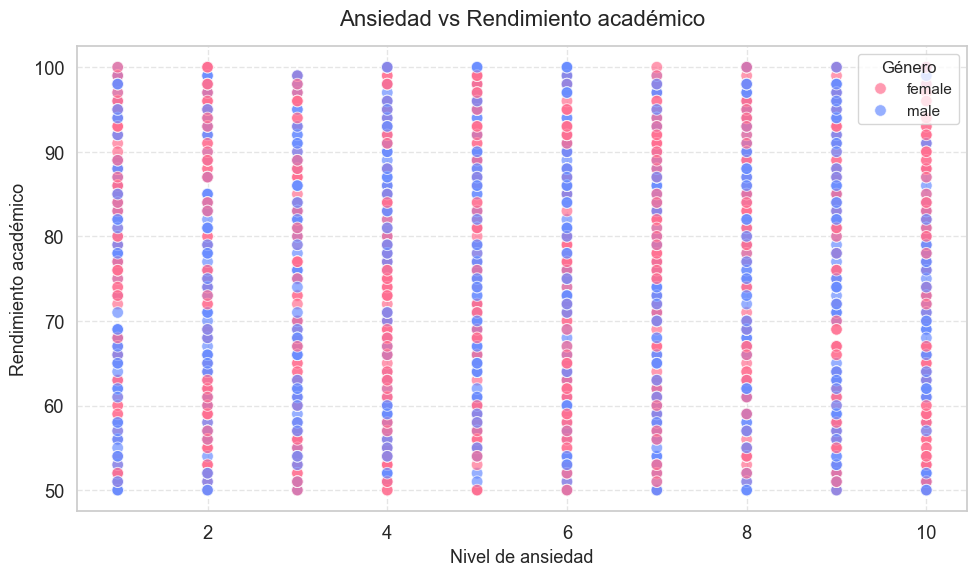

In [12]:
# Ansiedad vs Rendimiento académico
sns.set(style='whitegrid', font_scale=1.2, rc={'axes.titlesize': 16, 'axes.labelsize': 13})

# Crear el gráfico
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x='anxiety_level',
    y='academic_performance',
    hue='gender',
    palette={'female': '#FF6F91', 'male': '#6A8DFF'},
    alpha=0.7,
    edgecolor='w',
    s=70
)

# Título y etiquetas
plt.title('Ansiedad vs Rendimiento académico', pad=15)
plt.xlabel('Nivel de ansiedad')
plt.ylabel('Rendimiento académico')
plt.legend(title='Género', title_fontsize=12, fontsize=11, loc='best')

# Ajustes
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## DESCRIPCIÓN GENERAL DEL GRÁFICO:
Ejes:

- Eje X: Nivel de ansiedad (de 1 a 10).

- Eje Y: Rendimiento académico (de 50 a 100).

Puntos de datos: Cada punto representa a un estudiante, codificado por género:

- Rojo: Mujeres (female)

- Azul: Hombres (male)

## ANÁLISIS:
Distribución por nivel de ansiedad:

- Para cada nivel de ansiedad (del 1 al 10), hay una gran dispersión en los niveles de rendimiento académico.

- Esto sugiere que el rendimiento académico varía ampliamente incluso dentro de un mismo nivel de ansiedad.

Relación ansiedad-rendimiento:

- No parece haber una tendencia clara (como una pendiente descendente o ascendente) entre los niveles de ansiedad y el rendimiento.

Comparación por género:

- Tanto hombres como mujeres están distribuidos de forma similar en todos los niveles de ansiedad y rendimiento.

- No se observa una diferencia notable entre los géneros en cuanto a su rendimiento en función del nivel de ansiedad.

## CONCLUSIONES:

No se identifica una relación directa entre ansiedad y rendimiento académico en el gráfico, lo cual podría indicar que otros factores también influyen en el rendimiento. La variabilidad individual parece ser alta: estudiantes con el mismo nivel de ansiedad pueden tener rendimientos muy diferentes. El género no parece ser un factor determinante en esta relación, ya que ambos grupos muestran una distribución similar.

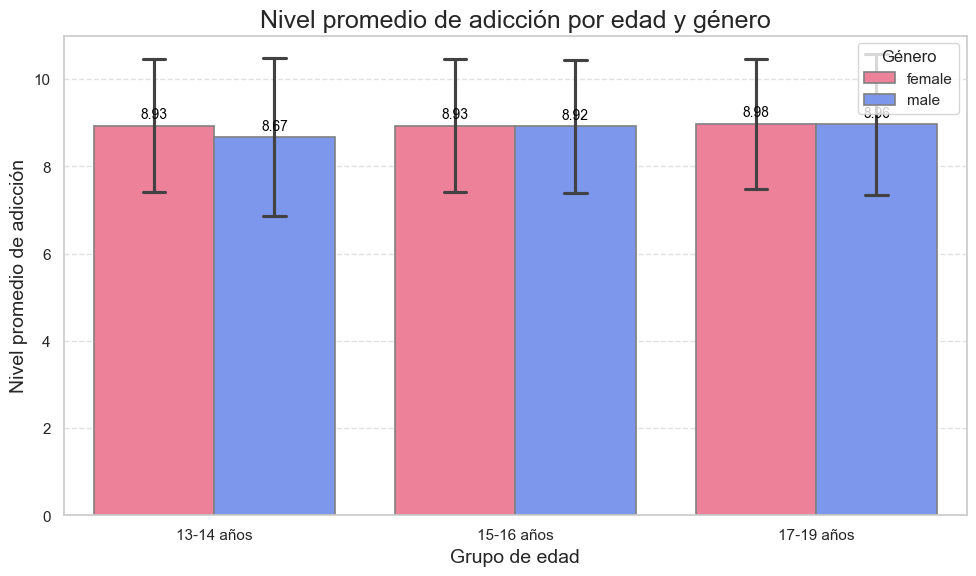

In [13]:
# Nivel promedio de adicción por edad y género
# Agrupar edades en rangos
df['Grupo de edad'] = pd.cut(
    df['age'],
    bins=[12, 14, 16, 19],
    labels=['13-14 años', '15-16 años', '17-19 años']
)

# Estilo visual
sns.set(style='whitegrid', font_scale=1.2, rc={'axes.titlesize': 18, 'axes.labelsize': 14})

# Crear el gráfico
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=df,
    x='Grupo de edad',
    y='addiction_level',
    hue='gender',
    palette={'female': '#FF6F91', 'male': '#6A8DFF'},
    errorbar='sd',
    capsize=0.15,
    edgecolor='gray',
    linewidth=1.2
)

# Agregar etiquetas sobre las barras con los promedios
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', padding=3, fontsize=10, color='black')

# Títulos y etiquetas más claras
plt.title('Nivel promedio de adicción por edad y género')
plt.xlabel('Grupo de edad')
plt.ylabel('Nivel promedio de adicción')

# Personalizar leyenda
plt.legend(title='Género', title_fontsize=12, fontsize=11, loc='upper right', frameon=True)

# Ajustes generales
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, 11)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

## DESCRIPCIÓN GENERAL DEL GRÁFICO

Ejes:

- Eje X: Nivel de ansiedad, con valores del 1 al 10.

- Eje Y: Rendimiento académico, con valores entre 50 y 100.

Color por categoría: El gráfico está segmentado por género (gender) usando la paleta "muted":

- Azul: Femenino (female)

- Naranja: Masculino (male)

Tamaño de la muestra: Alto (hay muchos puntos por cada nivel de ansiedad).

## ANÁLISIS:

Para cada nivel de ansiedad del 1 al 10, hay una distribución vertical de puntos, lo que indica múltiples observaciones por nivel.

La dispersión vertical indica que no hay un valor único de rendimiento asociado a cada nivel de ansiedad.

- Relación entre ansiedad y rendimiento académico:

No se observa una tendencia clara o lineal entre los niveles de ansiedad y el rendimiento académico.

Los puntajes de rendimiento académico están distribuidos de manera similar a lo largo de todos los niveles de ansiedad.

Esto sugiere que, al menos visualmente, no hay una correlación fuerte entre la ansiedad y el rendimiento académico.

- Diferencias por género:

Tanto hombres como mujeres están representados en todos los niveles de ansiedad y en toda la gama de rendimiento.

No se observa una diferencia notoria en la distribución de rendimiento académico entre géneros. Ambas distribuciones parecen bastante similares.

Esto puede indicar que el género no tiene un efecto claro sobre cómo la ansiedad influye en el rendimiento académico (al menos en esta visualización).

## Conclusión 

No se detecta una relación evidente entre ansiedad y rendimiento académico: La dispersión sugiere que estudiantes con altos o bajos niveles de ansiedad pueden rendir académicamente en un amplio rango.

No hay diferencias aparentes entre géneros en cuanto a cómo la ansiedad afecta el rendimiento académico.

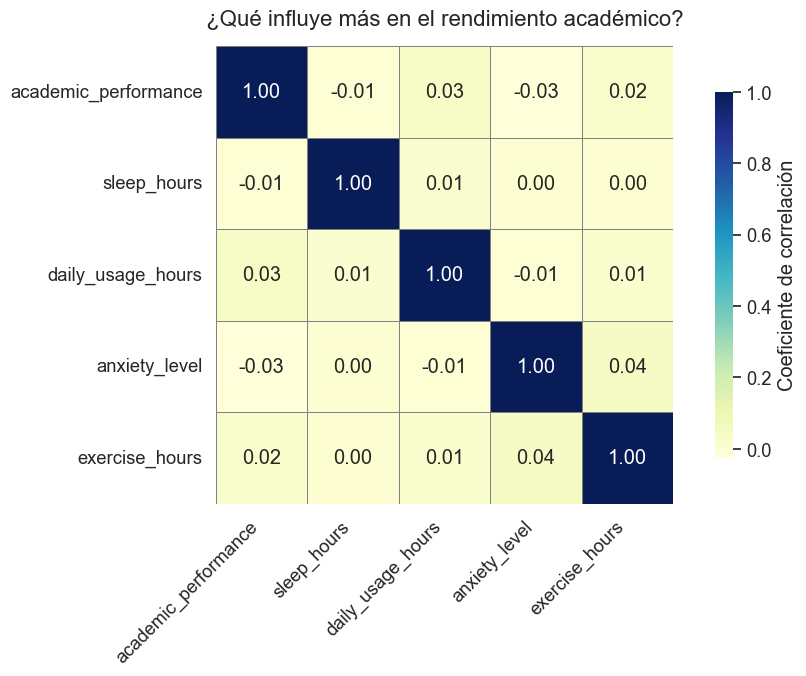

In [14]:
# "¿Qué influye más en el rendimiento académico?"

# Selección de variables para la correlación
corr_cols = ['academic_performance', 'sleep_hours', 'daily_usage_hours', 'anxiety_level', 'exercise_hours']

# Calcular la matriz de correlación
corr_matrix = df[corr_cols].corr()

# Estilo 
sns.set(style='white', font_scale=1.2)

# Crear figura
plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='YlGnBu',
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Coeficiente de correlación'}
)

# Títulos y etiquetas
plt.title('¿Qué influye más en el rendimiento académico?', fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



## DESCRIPCIÓN GENERAL DEL GRÁFICO:
Matriz de correlación: Cada celda muestra un coeficiente de correlación de Pearson, que varía entre:

+1: correlación positiva perfecta

0: sin correlación

-1: correlación negativa perfecta

El color y el valor numérico indican la fuerza de la relación.

## Interpretación de correlaciones con el rendimiento académico:
Variable	           Correlación con rendimiento académico	      Interpretación
sleep_hours	           -0.01	                                      Prácticamente sin relación
daily_usage_hours	   +0.03	                                      Relación muy débil y positiva
anxiety_level	       -0.03	                                      Relación muy débil y negativa
exercise_hours	       +0.02	                                      Relación muy débil y positiva

Todos los coeficientes están muy cerca de 0, lo que indica que ninguna de estas variables muestra una relación significativa con el rendimiento académico en este conjunto de datos.

## CONCLUSIONES:
Ninguna variable analizada tiene un impacto fuerte sobre el rendimiento académico según esta matriz.

Aunque popularmente se piensa que factores como sueño, uso de tecnología, ansiedad o ejercicio influyen mucho en el rendimiento académico, en esta muestra específica no se observa una correlación clara.

La variable con mayor correlación positiva es daily_usage_hours (+0.03), pero sigue siendo estadísticamente irrelevante.

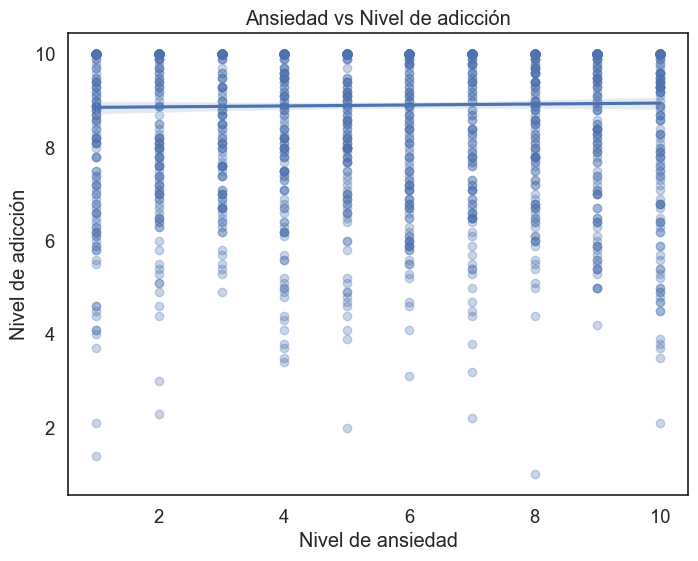

In [15]:
# "Ansiedad vs Nivel de adicción".
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='anxiety_level', y='addiction_level', scatter_kws={'alpha':0.3})
plt.title('Ansiedad vs Nivel de adicción')
plt.xlabel('Nivel de ansiedad')
plt.ylabel('Nivel de adicción')
plt.show()

## DESCRIPCIÓN GENERAL DEL GRÁFICO:
- Eje X: Nivel de ansiedad (1 a 10).

- Eje Y: Nivel de adicción (1 a 10).

Cada punto representa a una persona, y hay una línea de tendencia horizontal (regresión lineal).

## ANÁLISIS:
- Distribución de puntos:

La mayoría de los puntos están agrupados entre los niveles de adicción 8 y 10, en todos los niveles de ansiedad. Esto sugiere que la adicción es alta de forma generalizada, sin importar si el nivel de ansiedad es bajo o alto.

- Línea de tendencia:

Es prácticamente horizontal, lo que indica que no hay relación lineal entre ansiedad y adicción. Es decir, a mayor ansiedad no necesariamente corresponde un mayor nivel de adicción, y viceversa.

- Variabilidad:

Dentro de cada nivel de ansiedad hay bastante dispersión en los niveles de adicción, aunque la mayoría están concentrados en valores altos (8–10). Algunos casos extremos tienen niveles de adicción bajos (1–4), pero son minoría.

## CONCLUSIONES:
No se observa una correlación clara entre ansiedad y nivel de adicción.

Aunque intuitivamente podría esperarse que mayor ansiedad se asocie con mayor adicción (por ejemplo, a redes sociales o dispositivos), este gráfico no lo respalda estadísticamente.

Ambos factores parecen ser independientes entre sí en esta muestra.

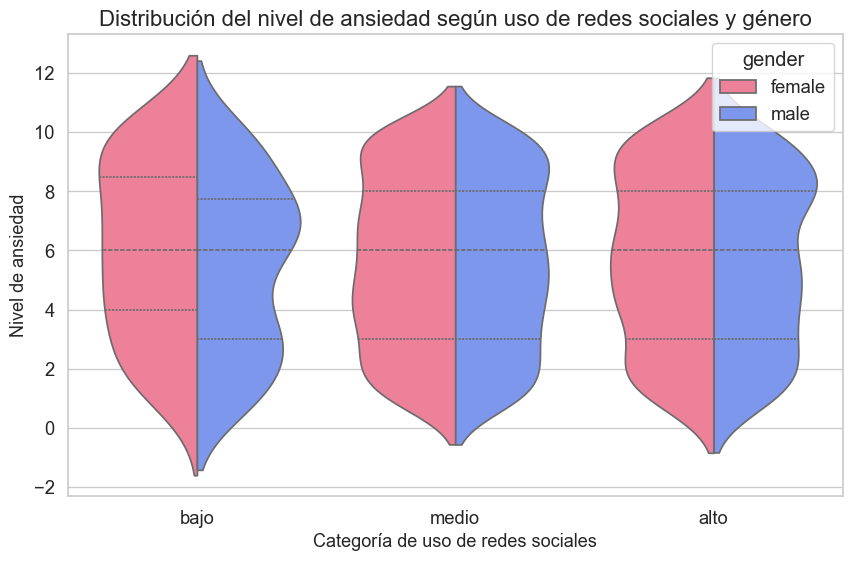

In [16]:
## Distribución del nivel de ansiedad según uso de redes sociales y género
# Crear variable categórica directamente
df['uso_redes_categoria'] = pd.cut(
    df['time_on_social_media'],
    bins=[-0.1, 1, 3, df['time_on_social_media'].max()],
    labels=['bajo', 'medio', 'alto']
)

# Configuración gráfica
sns.set(style='whitegrid', font_scale=1.2, rc={'axes.titlesize': 16, 'axes.labelsize': 13})

# Crear figura y violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df,
    x='uso_redes_categoria',
    y='anxiety_level',
    hue='gender',
    split=True,
    inner='quart',
    palette={'female': '#FF6F91', 'male': '#6A8DFF'}
)

plt.title('Distribución del nivel de ansiedad según uso de redes sociales y género', fontsize=16)
plt.xlabel('Categoría de uso de redes sociales')
plt.ylabel('Nivel de ansiedad')
plt.show()


## DESCRIPCIÓN GENERAL DEL GRÁFICO:

Es un gráfico de violín, que muestra la distribución de una variable (en este caso, nivel de ansiedad) dentro de diferentes categorías:

Categoría de uso de redes sociales: bajo, medio y alto.

Género:

- Rosa: mujeres (female)
- Azul: hombres (male)

## ANÁLISIS:
Ejes:

- Eje X: Categoría de uso de redes sociales (bajo, medio, alto).
- Eje Y: Nivel de ansiedad (de 0 a 12).

Distribución del nivel de ansiedad:

En todas las categorías de uso (bajo, medio, alto), el nivel de ansiedad tiene una distribución bastante amplia (de 0 hasta más de 10).

Las curvas más anchas indican donde se concentra la mayor cantidad de datos.

Comparación entre categorías de uso:

- Uso bajo: distribución más dispersa, con más personas en niveles bajos y altos de ansiedad.

- Uso medio: distribución más balanceada, centrada en niveles intermedios (4–8).

- Uso alto: también centrado en niveles intermedios-altos, pero con menos personas en niveles muy bajos de ansiedad.

En general, el nivel de ansiedad tiende a aumentar ligeramente con el mayor uso de redes sociales, aunque la diferencia no es drástica.

*  Comparación por género:

La forma de las curvas es bastante similar entre hombres y mujeres en cada categoría.

Esto sugiere que el género no genera una diferencia significativa en cómo se distribuye el nivel de ansiedad en función del uso de redes sociales.

## CONCLUSIONES:
Hay una tendencia leve a mayor ansiedad con mayor uso de redes sociales, pero no es muy marcada.

La distribución es bastante similar entre géneros, por lo que el uso de redes sociales influye en la ansiedad de forma similar en hombres y mujeres.

La variabilidad es alta en todos los niveles, lo que indica que no todos los usuarios intensivos tienen alta ansiedad, ni todos los de bajo uso tienen baja ansiedad.

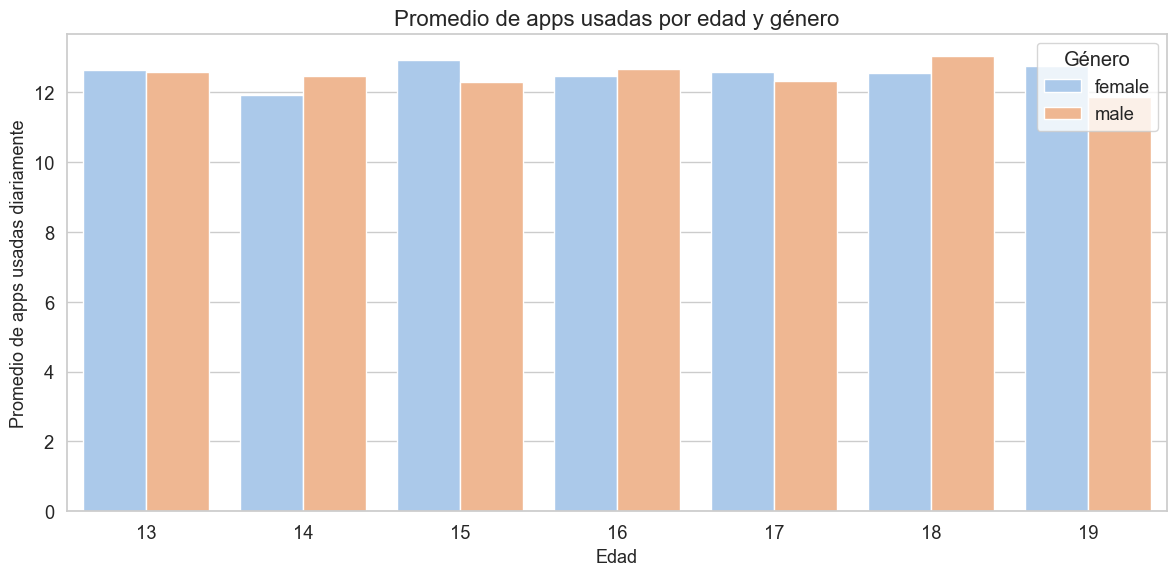

In [17]:
# Promedio de apps usadas por edad y género

# Agrupar por edad y género calculando promedio apps usadas
apps_por_edad_genero = df.groupby(['age', 'gender'])['apps_used_daily'].mean().reset_index()

# Gráfico de barras con seaborn
plt.figure(figsize=(12,6))
sns.barplot(data=apps_por_edad_genero, x='age', y='apps_used_daily', hue='gender', palette='pastel')

plt.xlabel('Edad')
plt.ylabel('Promedio de apps usadas diariamente')
plt.title('Promedio de apps usadas por edad y género')
plt.legend(title='Género')
plt.tight_layout()
plt.show()


## DESCRIPCIÓN GENERAL DEL GRÁFICO

- Eje X (horizontal): Muestra las edades de los participantes, desde 13 hasta 19 años.

- Eje Y (vertical): Indica el promedio de aplicaciones móviles usadas diariamente por los participantes en cada grupo de edad.

Barras de colores:

- La barra azul claro representa el promedio de apps usadas por mujeres en cada edad.

- La barra naranja claro representa el promedio de apps usadas por hombres en cada edad.

- Altura de las barras: Cuanto más alta es la barra, mayor es el número promedio de apps usadas diariamente por ese grupo de edad y género.

- Leyenda: Ubicada en la parte superior derecha, identifica qué color corresponde a cada género (female = mujeres, male = hombres).

## ANÁLISIS

- Comparación general entre géneros:
En general, tanto mujeres (female) como hombres (male) usan un promedio similar de apps diariamente.

No hay diferencias muy marcadas entre géneros; las barras para ambos colores están bastante parecidas en altura para casi todas las edades.

- Tendencias por edad:
La cantidad de apps usadas no varía demasiado con la edad: oscila entre aproximadamente 12 y 13 apps usadas en promedio.

- Hay ligeras fluctuaciones:

Por ejemplo, a los 15 años, las mujeres muestran un pico ligeramente más alto.

A los 18 años, los hombres usan un poco más apps en promedio que las mujeres.

- Simetría en la diferencia:
En algunas edades, las mujeres usan un poco más apps que los hombres (e.g., 13, 15, 17, 19 años).

En otras, ocurre al revés (e.g., 14, 16, 18 años).

Esto sugiere que no hay un patrón claro que favorezca a un género sobre otro en cuanto a la cantidad de apps usadas.

## CONCLUSIONES

El análisis revela que no existen diferencias significativas entre hombres y mujeres en cuanto al uso promedio diario de aplicaciones. Ambos géneros utilizan una cantidad similar de apps, con ligeras variaciones en edades específicas, pero sin un patrón consistente que favorezca a uno sobre el otro. Asimismo, la cantidad de apps usadas no cambia drásticamente con la edad, manteniéndose relativamente estable entre los 13 y 19 años. En conjunto, estos resultados sugieren que el uso de aplicaciones es un comportamiento bastante uniforme entre adolescentes, independientemente del género o la edad.

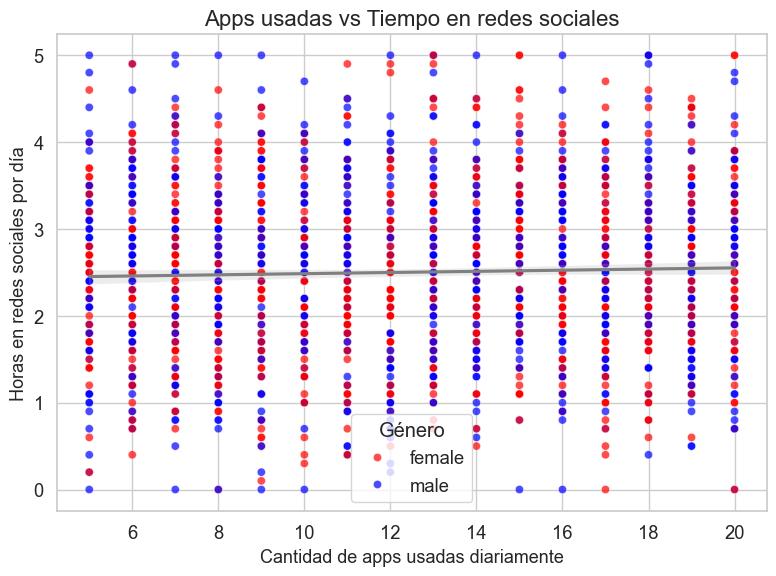

In [ ]:
#apps_used_daily vs time_on_social_media
#Este gráfico identifica si usar más apps implica más tiempo en redes sociales:

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='apps_used_daily',
    y='time_on_social_media',
    hue='gender',
    palette={'female': 'red', 'male': 'blue'},
    alpha=0.7
)
sns.regplot(
    data=df,
    x='apps_used_daily',
    y='time_on_social_media',
    scatter=False,
    color='gray'
)
plt.title('Apps usadas vs Tiempo en redes sociales')
plt.xlabel('Cantidad de apps usadas diariamente')
plt.ylabel('Horas en redes sociales por día')
plt.legend(title='Género')
plt.grid(True)
plt.tight_layout()
plt.show()

# Descripción general
Este gráfico analiza la relación entre la cantidad de aplicaciones utilizadas diariamente (apps_used_daily) y el tiempo que los adolescentes pasan en redes sociales (time_on_social_media).

# Análisis
Existe una correlación positiva clara: a mayor número de apps utilizadas, mayor tiempo en redes sociales.

Las mujeres tienden a pasar más tiempo en redes sociales con la misma cantidad de apps que los hombres.

Algunos adolescentes usan pocas apps, pero dedican muchas horas en redes, lo que indica un uso intensivo de unas pocas plataformas.

# Conclusiones
El número de aplicaciones usadas puede predecir parcialmente el tiempo dedicado a redes sociales.

Esta relación puede ser útil para identificar perfiles de uso problemático, incluso cuando el número de apps no es excesivo.

Los resultados sugieren la necesidad de educación digital enfocada no solo en cantidad, sino en calidad y propósito del uso de estas aplicaciones.

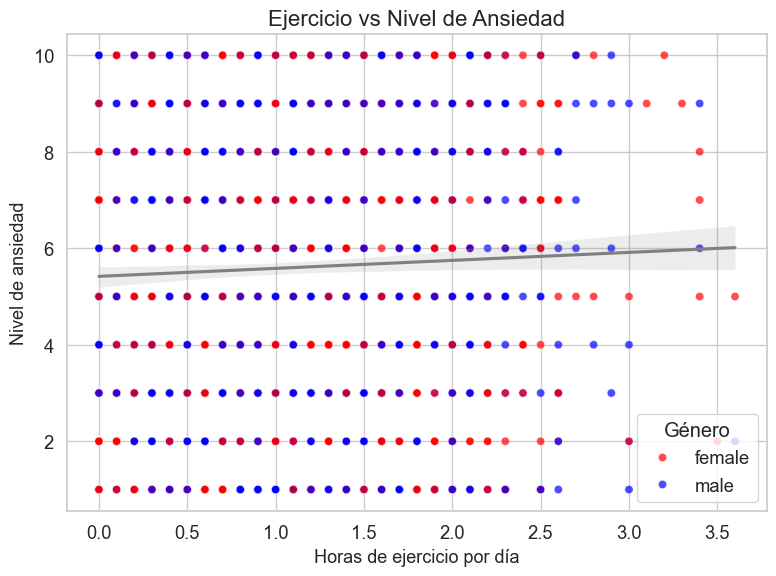

In [19]:
#exercise_hours vs anxiety_level
#Relación entre el ejercicio y el nivel de ansiedad. Ideal para evaluar si menos ejercicio se asocia a más ansiedad:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='exercise_hours',
    y='anxiety_level',
    hue='gender',
    palette={'female': 'red', 'male': 'blue'},
    alpha=0.7
)
sns.regplot(
    data=df,
    x='exercise_hours',
    y='anxiety_level',
    scatter=False,
    color='gray'
)
plt.title('Ejercicio vs Nivel de Ansiedad')
plt.xlabel('Horas de ejercicio por día')
plt.ylabel('Nivel de ansiedad')
plt.legend(title='Género')
plt.grid(True)
plt.tight_layout()
plt.show()

# Descripción general
Este gráfico explora cómo las horas de ejercicio físico diarias (exercise_hours) se relacionan con el nivel de ansiedad (anxiety_level). Se incluyen puntos por género, con una línea de tendencia general que resalta el patrón entre ambas variables.

# Análisis
La tendencia general es negativa: a mayor cantidad de ejercicio diario, menor nivel de ansiedad.

Los adolescentes con menos de una hora diaria de ejercicio presentan niveles de ansiedad más elevados en ambos géneros.

Algunos casos con ansiedad alta (valores cercanos a 10) se concentran en quienes no realizan ejercicio.

# Conclusiones
El ejercicio físico diario parece tener un efecto protector sobre la salud mental, reduciendo los niveles de ansiedad.

Fomentar la actividad física entre adolescentes podría ser una estrategia efectiva para mejorar el bienestar emocional y reducir síntomas de ansiedad.

<Figure size 800x600 with 0 Axes>

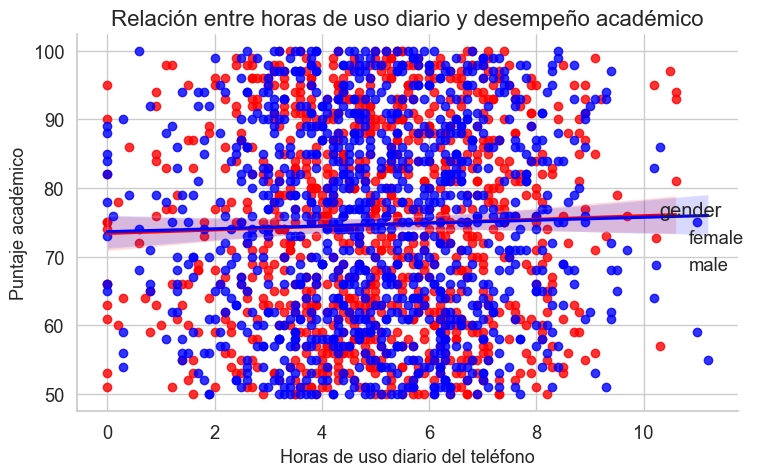

In [20]:
# daily_usage_hours vs academic_performance (con línea de tendencia)
# Este gráfico ayuda a analizar si más horas en el teléfono impactan negativamente en el rendimiento académico:

plt.figure(figsize=(8, 6))
sns.lmplot(
    data=df,
    x='daily_usage_hours',
    y='academic_performance',
    hue='gender',
    palette={'female': 'red', 'male': 'blue'},
    aspect=1.3
)
plt.title('Relación entre horas de uso diario y desempeño académico')
plt.xlabel('Horas de uso diario del teléfono')
plt.ylabel('Puntaje académico')
plt.tight_layout()
plt.show()

# Descripción general
Este gráfico muestra la relación entre el número de horas que los adolescentes usan el teléfono diariamente (daily_usage_hours) y su rendimiento académico (academic_performance). La visualización incluye una línea de regresión para identificar tendencias, y los datos están separados por género (rojo para mujeres, azul para hombres).

# Análisis
Se observa una ligera tendencia negativa: a mayor uso del teléfono, el desempeño académico tiende a disminuir, aunque no es una caída abrupta.

El grupo femenino presenta más casos con uso elevado del teléfono y rendimiento alto, mientras que en hombres la tendencia negativa parece más marcada.

Los estudiantes que usan el teléfono por más de 8 horas diarias tienden a concentrarse en un rango académico más bajo.

# Conclusiones
Existe una correlación moderada negativa entre el uso excesivo del teléfono y el rendimiento académico.

Aunque no es concluyente para todos los casos, sí sugiere que limitar el tiempo frente a la pantalla podría beneficiar el desempeño académico, especialmente en adolescentes con hábitos intensivos de uso. 